In [1]:
import numpy as np  # Linear algebra and numerical operations
import pandas as pd  # Data processing and CSV file I/O
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Basic plotting
import plotly.graph_objects as go  # Plotly graphical objects
import plotly.express as px  # Plotly high-level functions
from plotly.offline import init_notebook_mode, iplot  # Plotly offline mode

# Initialize Plotly for offline use
init_notebook_mode(connected=True)

# List files in the input directory
import os
print(os.listdir("input"))

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set style for Matplotlib plots
plt.style.use('ggplot')

# Example usage:
# Creating a simple scatter plot with Plotly
fig = go.Figure(data=[go.Scatter(
    x=np.random.rand(10),
    y=np.random.rand(10),
    mode='markers',
    marker=dict(size=12, color='rgba(255, 182, 193, .9)', line=dict(width=2, color='rgba(0, 0, 0, .8)'))
)])
fig.update_layout(title='Sample Scatter Plot')
iplot(fig)


['cwurData.csv', 'database_earthquake.csv', 'education_expenditure_supplementary_data.csv', 'Iris.csv', 'MedianHouseholdIncome2015.csv', 'PercentagePeopleBelowPovertyLevel.csv', 'PercentOver25CompletedHighSchool.csv', 'PoliceKillingsUS.csv', 'school_and_country_table.csv', 'shanghaiData.csv', 'ShareRaceByCity.csv', 'timesData.csv', 'weatherww2', 'world-war-ii']


In [2]:
# bombing data
aerial = pd.read_csv("input/world-war-ii/operations.csv")
# first weather data that includes locations like country, latitude and longitude.
weather_station_location = pd.read_csv("input/weatherww2/Weather Station Locations.csv")
# Second weather data that includes measured min, max and mean temperatures
weather = pd.read_csv("input/weatherww2/Summary of Weather.csv")

Data Description
I only explain data features that we will use in this kernel.

Aerial bombing Data description:
Mission Date: Date of mission
Theater of Operations: Region in which active military operations are in progress; "the army was in the field awaiting action"; Example: "he served in the Vietnam theater for three years"
Country: Country that makes mission or operation like USA
Air Force: Name or id of air force unity like 5AF
Aircraft Series: Model or type of aircraft like B24
Callsign: Before bomb attack, message, code, announcement, or tune that is broadcast by radio.
Takeoff Base: Takeoff airport name like Ponte Olivo Airfield
Takeoff Location: takeoff region Sicily
Takeoff Latitude: Latitude of takeoff region
Takeoff Longitude: Longitude of takeoff region
Target Country: Target country like Germany
Target City: Target city like Berlin
Target Type: Type of target like city area
Target Industry: Target industy like town or urban
Target Priority: Target priority like 1 (most)
Target Latitude: Latitude of target
Target Longitude: Longitude of target
Weather Condition data description:
Weather station location:
WBAN: Weather station number
NAME: weather station name
STATE/COUNTRY ID: acronym of countries
Latitude: Latitude of weather station
Longitude: Longitude of weather station
Weather:
STA: eather station number (WBAN)
Date: Date of temperature measurement
MeanTemp: Mean temperature

Data Cleaning


In [3]:
aerial = aerial[pd.notna(aerial.Country)]


In [4]:
aerial = aerial[pd.notna(aerial['Target Longitude'])]


In [5]:
aerial = aerial[pd.notna(aerial['Takeoff Longitude'])]


In [6]:
drop_list = ['Mission ID', 'Unit ID', 'Target ID', 'Altitude (Hundreds of Feet)', 'Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type', 'Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment', 'Source ID']
aerial.drop(drop_list, axis=1, inplace=True)


In [7]:
aerial = aerial[aerial.iloc[:, 8] != "4248"]  # Drop this takeoff latitude
aerial = aerial[aerial.iloc[:, 9] != 1355]   # Drop this takeoff longitude


In [8]:
aerial.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mission Date           2555 non-null   object 
 1   Theater of Operations  2555 non-null   object 
 2   Country                2555 non-null   object 
 3   Air Force              2505 non-null   object 
 4   Aircraft Series        2528 non-null   object 
 5   Callsign               10 non-null     object 
 6   Takeoff Base           2555 non-null   object 
 7   Takeoff Location       2555 non-null   object 
 8   Takeoff Latitude       2555 non-null   object 
 9   Takeoff Longitude      2555 non-null   float64
 10  Target Country         2499 non-null   object 
 11  Target City            2552 non-null   object 
 12  Target Type            602 non-null    object 
 13  Target Industry        81 non-null     object 
 14  Target Priority        230 non-null    object 
 15  Ta

In [9]:
aerial.drop_duplicates(inplace=True)


In [10]:
aerial['Target Longitude'] = pd.to_numeric(aerial['Target Longitude'], errors='coerce')
aerial['Takeoff Longitude'] = pd.to_numeric(aerial['Takeoff Longitude'], errors='coerce')


In [11]:
# what we will use only
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   Latitude          161 non-null    float64
 4   Longitude         161 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [12]:
# what we will use only
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


Data Visualization


USA              1669
GREAT BRITAIN     528
NEW ZEALAND        92
SOUTH AFRICA       14
Name: Country, dtype: int64


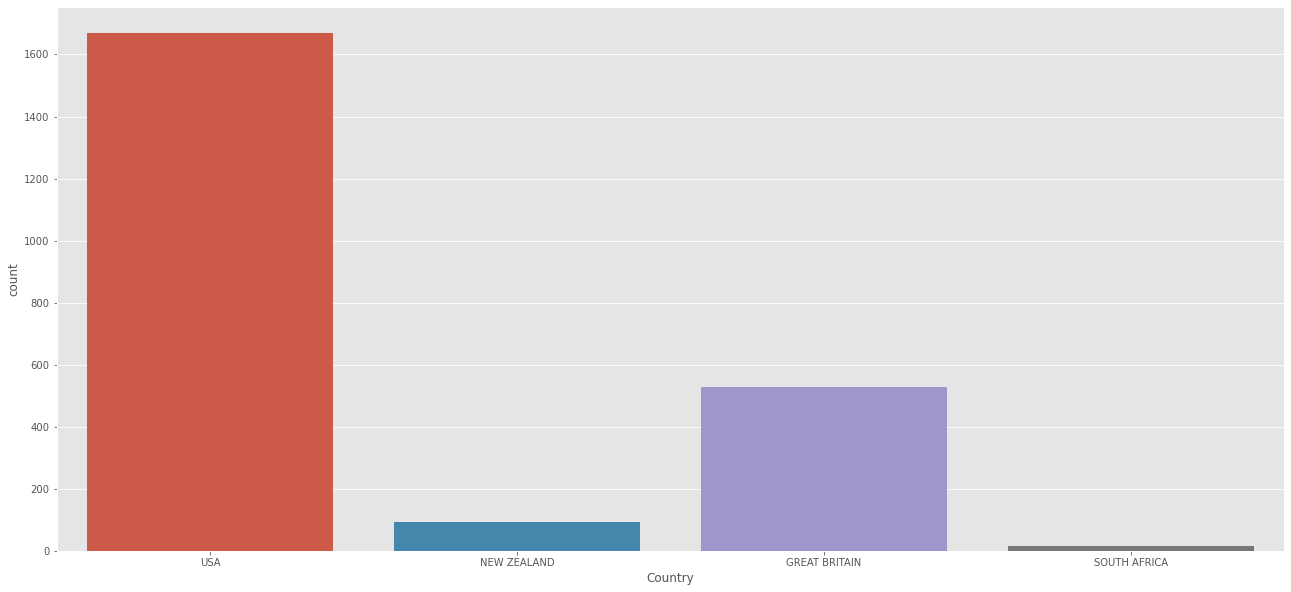

In [13]:
# country
print(aerial['Country'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Country'])
plt.show()

ITALY      989
BURMA      322
LIBYA      263
GREECE      84
TUNISIA     83
EGYPT       71
CHINA       51
GERMANY     41
SICILY      40
JAPAN       37
Name: Target Country, dtype: int64


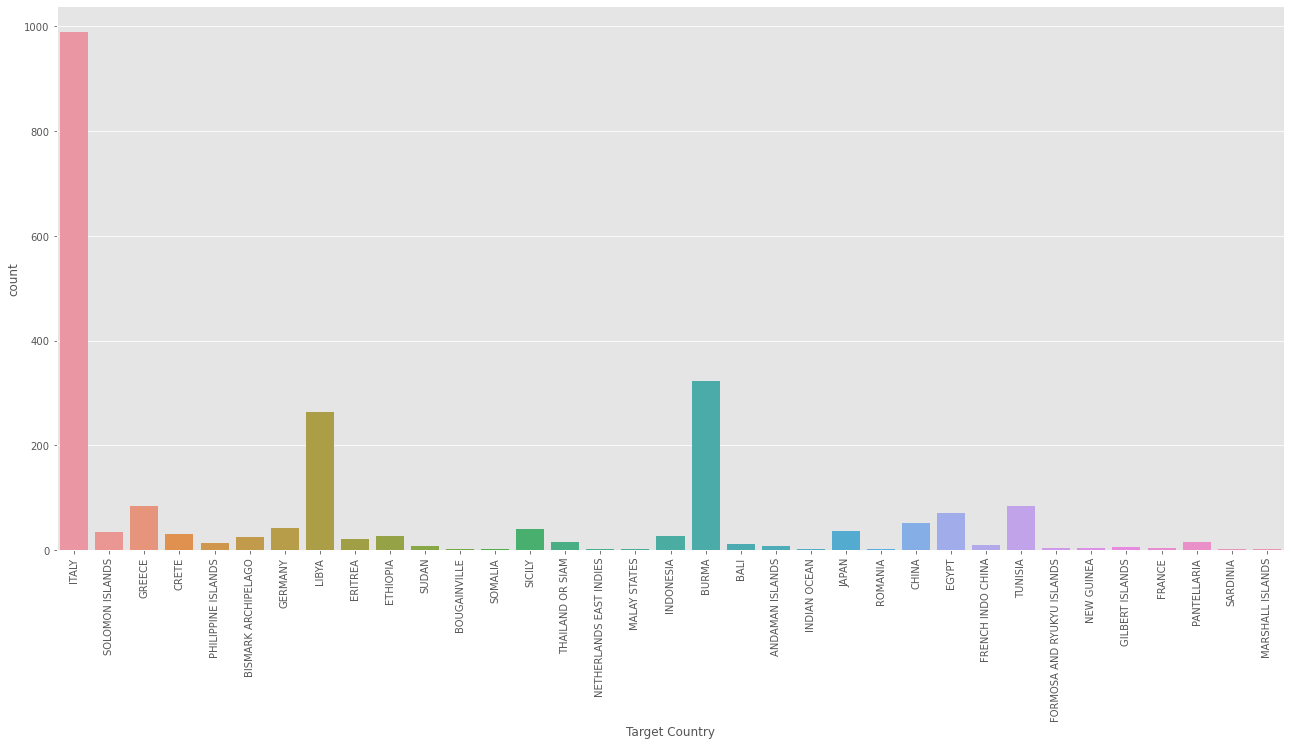

In [14]:
# Top target countries
print(aerial['Target Country'].value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(aerial['Target Country'])
plt.xticks(rotation=90)
plt.show()

In [15]:
# Aircraft Series
data = aerial['Aircraft Series'].value_counts()
print(data[:10])
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

A36             883
B25             345
B24             318
BLEN            175
LIB             135
WELL            129
B17              94
PV-1 VENTURA     63
WHIT             32
HALI             17
Name: Aircraft Series, dtype: int64


In [16]:
aerial.head()


Mission Date Theater of Operations Country Air Force Aircraft Series  \
0    8/15/1943                   MTO     USA     12 AF             A36   
2    8/15/1943                   MTO     USA     12 AF             A36   
3    8/15/1943                   MTO     USA     12 AF             A36   
8    8/15/1943                   MTO     USA     12 AF             A36   
9    8/15/1943                   MTO     USA     12 AF             A36   

  Callsign          Takeoff Base Takeoff Location Takeoff Latitude  \
0      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   
2      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   
3      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   
8      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   
9      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   

   Takeoff Longitude Target Country  Target City Target Type  \
0          14.321464          ITALY    SPADAFORA         NaN   
2          14.321464          ITALY      COSENZA         NaN   
3          14.321464          ITALY  GIOJA TAURO         NaN   
8          14.321464          ITALY       SCILLA         NaN   
9          14.321464          ITALY  GIOJA TAURO         NaN   

                Target Industry Target Priority  Target Latitude  \
0                           NaN             NaN            38.22   
2                           NaN             NaN            39.27   
3                           NaN             NaN            38.43   
8                           NaN             NaN            38.23   
9  ARMAMENT AND ORDNANCE PLANTS             NaN            38.43   

   Target Longitude  
0             15.37  
2             16.25  
3             15.90  
8             15.72  
9             15.90

In [26]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Assign colors using .loc
aerial.loc[aerial.Country == "USA", "color"] = "rgb(0,116,217)"
aerial.loc[aerial.Country == "GREAT BRITAIN", "color"] = "rgb(255,65,54)"
aerial.loc[aerial.Country == "NEW ZEALAND", "color"] = "rgb(133,20,75)"
aerial.loc[aerial.Country == "SOUTH AFRICA", "color"] = "rgb(255,133,27)"

# Prepare the data for the plot
data = [go.Scattergeo(
    lon=aerial['Takeoff Longitude'],
    lat=aerial['Takeoff Latitude'],
    text="Country: " + aerial.Country + "<br>Takeoff Location: " + aerial["Takeoff Location"] + "<br>Takeoff Base: " + aerial['Takeoff Base'],
    hoverinfo='text',
    mode='markers',
    marker=dict(
        sizemode='area',
        sizeref=1,
        size=10,
        line=dict(width=1, color="white"),
        color=aerial["color"],
        opacity=0.7
    )
)]

# Define the layout of the plot
layout = go.Layout(
    title='Countries Take Off Bases',
    hovermode='closest',
    geo=dict(
        showframe=False,
        showland=True,
        showcoastlines=True,
        showcountries=True,
        countrywidth=1,
        projection=dict(type='mercator'),
        landcolor='rgb(217, 217, 217)',
        subunitwidth=1,
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        countrycolor="rgb(5, 5, 5)"
    )
)

# Create and plot the figure
fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [28]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Trace 1: Airports
airports = go.Scattergeo(
    lon=aerial['Takeoff Longitude'],
    lat=aerial['Takeoff Latitude'],
    hoverinfo='text',
    text="Country: " + aerial.Country + "<br>Takeoff Location: " + aerial["Takeoff Location"] + "<br>Takeoff Base: " + aerial['Takeoff Base'],
    mode='markers',
    marker=dict(
        size=5,
        color=aerial["color"],
        line=dict(
            width=1,
            color="white"
        )
    )
)

# Trace 2: Targets
targets = go.Scattergeo(
    lon=aerial['Target Longitude'],
    lat=aerial['Target Latitude'],
    hoverinfo='text',
    text="Target Country: " + aerial["Target Country"] + "<br>Target City: " + aerial["Target City"],
    mode='markers',
    marker=dict(
        size=5,
        color="red",
        line=dict(
            width=0.5,
            color="red"
        )
    )
)

# Trace 3: Flight Paths
flight_paths = []
for i in range(len(aerial)):
    flight_paths.append(go.Scattergeo(
        lon=[aerial.iloc[i]['Takeoff Longitude'], aerial.iloc[i]['Target Longitude']],
        lat=[aerial.iloc[i]['Takeoff Latitude'], aerial.iloc[i]['Target Latitude']],
        mode='lines',
        line=dict(
            width=0.7,
            color='black',
        ),
        opacity=0.6,
    ))

# Layout
layout = go.Layout(
    title='Bombing Paths from Attacker Country to Target',
    hovermode='closest',
    geo=dict(
        showframe=False,
        showland=True,
        showcoastlines=True,
        showcountries=True,
        countrywidth=1,
        projection=dict(type='mercator'),
        landcolor='rgb(217, 217, 217)',
        subunitwidth=1,
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        countrycolor="rgb(5, 5, 5)"
    )
)

# Create and plot the figure
fig = go.Figure(data=flight_paths + [airports, targets], layout=layout)
iplot(fig)


MTO            1626
CBI             410
PTO             187
ETO              44
EAST AFRICA      36
Name: Theater of Operations, dtype: int64


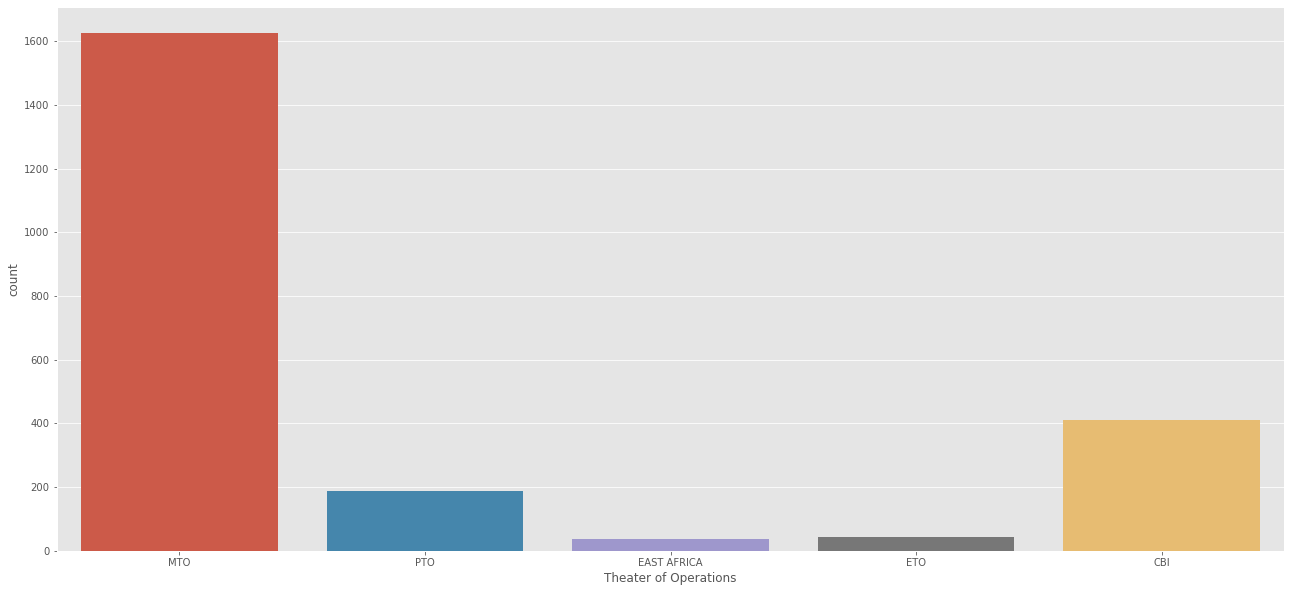

In [29]:
#Theater of Operations
print(aerial['Theater of Operations'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Theater of Operations'])
plt.show()

In [31]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Prepare the data for the plot
data = [go.Scattergeo(
    lon=weather_station_location.Longitude,
    lat=weather_station_location.Latitude,
    hoverinfo='text',
    text="Name: " + weather_station_location.NAME + "<br>Country: " + weather_station_location["STATE/COUNTRY ID"],
    mode='markers',
    marker=dict(
        sizemode='area',
        sizeref=1,
        size=8,
        line=dict(width=1, color="white"),
        color="blue",
        opacity=0.7
    )
)]

# Define the layout of the plot
layout = go.Layout(
    title='Weather Station Locations',
    hovermode='closest',
    geo=dict(
        showframe=False,
        showland=True,
        showcoastlines=True,
        showcountries=True,
        countrywidth=1,
        projection=dict(type='mercator'),
        landcolor='rgb(217, 217, 217)',
        subunitwidth=1,
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        countrycolor="rgb(5, 5, 5)"
    )
)

# Create and plot the figure
fig = go.Figure(data=data, layout=layout)
iplot(fig)


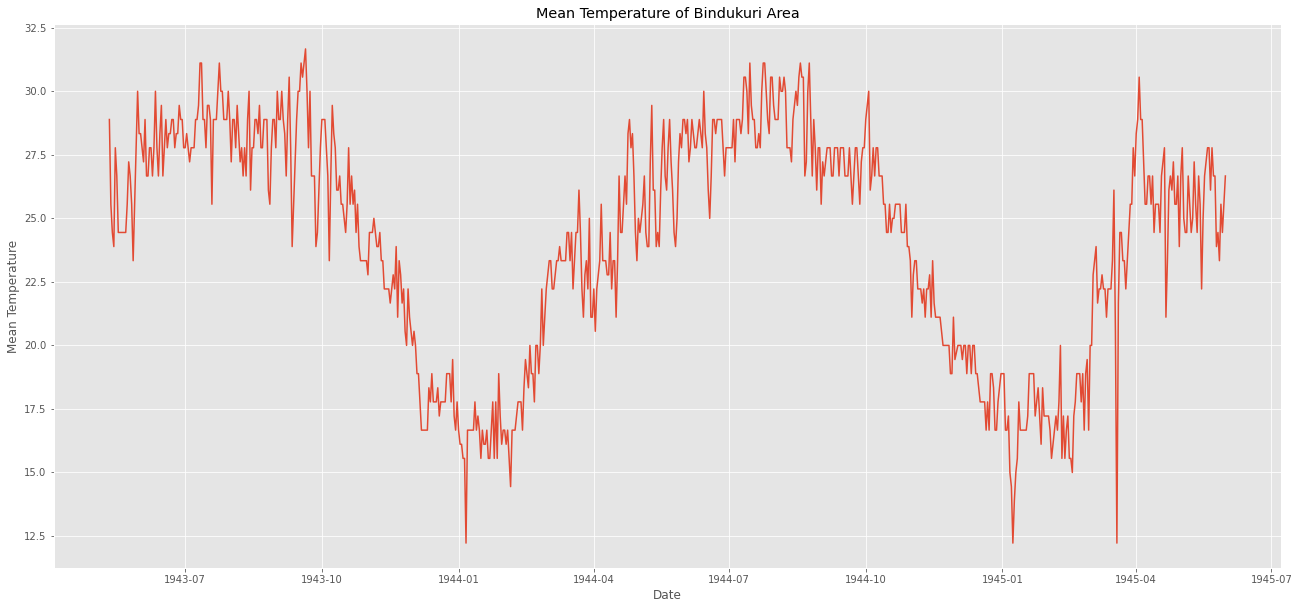

In [32]:
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN 
weather_bin = weather[weather.STA == 32907]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

In [33]:
aerial = pd.read_csv("input/world-war-ii/operations.csv")
aerial["year"] = [ each.split("/")[2] for each in aerial["Mission Date"]]
aerial["month"] = [ each.split("/")[0] for each in aerial["Mission Date"]]
aerial = aerial[aerial["year"]>="1943"]
aerial = aerial[aerial["month"]>="8"]

aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])

attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = aerial[aerial.Country == attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
aerial_war = aerial_war[aerial_war["Target City"] == city]

In [34]:
# I get very tired while writing this part, so sorry for this dummy code But I guess you got the idea
liste = []
aa = []
for each in aerial_war["Mission Date"]:
    dummy = weather_bin[weather_bin.Date == each]
    liste.append(dummy["MeanTemp"].values)
aerial_war["dene"] = liste
for each in aerial_war.dene.values:
    aa.append(each[0])

# Create a trace
trace = go.Scatter(
    x = weather_bin.Date,
    mode = "lines",
    y = weather_bin.MeanTemp,
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    name = "Mean Temperature"
)
trace1 = go.Scatter(
    x = aerial_war["Mission Date"],
    mode = "markers",
    y = aa,
    marker = dict(color = 'rgba(16, 0, 200, 1)'),
    name = "Bombing temperature"
)
layout = dict(title = 'Mean Temperature --- Bombing Dates and Mean Temperature at this Date')
data = [trace,trace1]

fig = dict(data = data, layout = layout)
iplot(fig)

Time Series Prediction with ARIMA


What is time series?


Stationarity of a Time Series


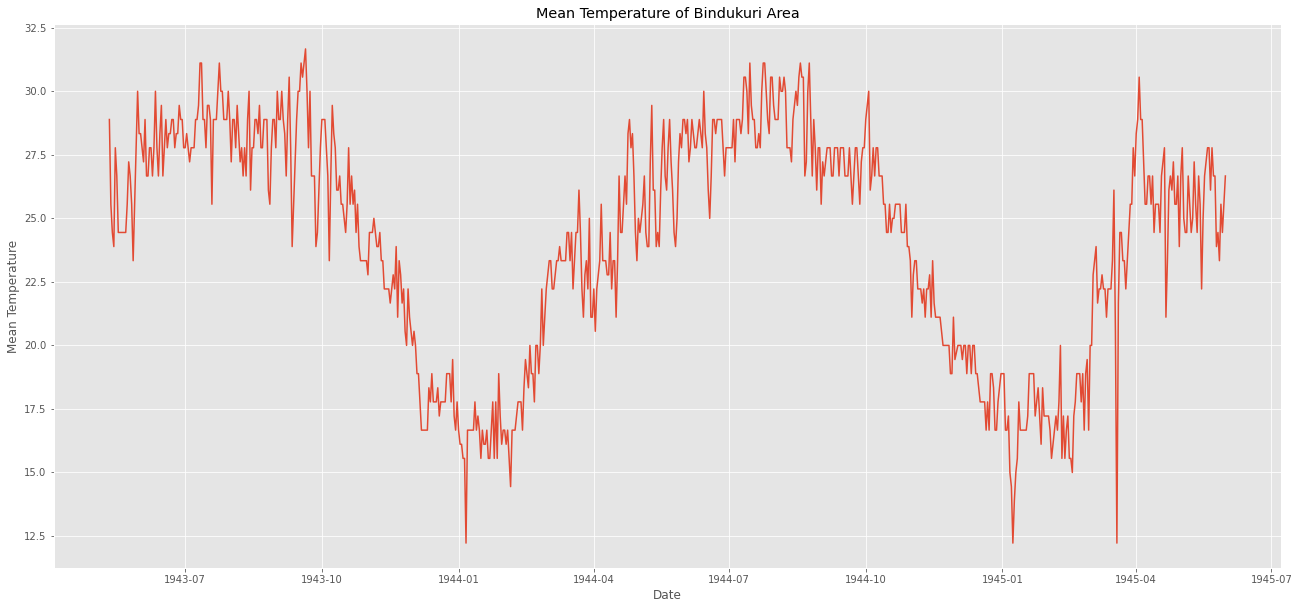

In [35]:
# Mean temperature of Bindikuri area
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

# lets create time series from weather 
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)

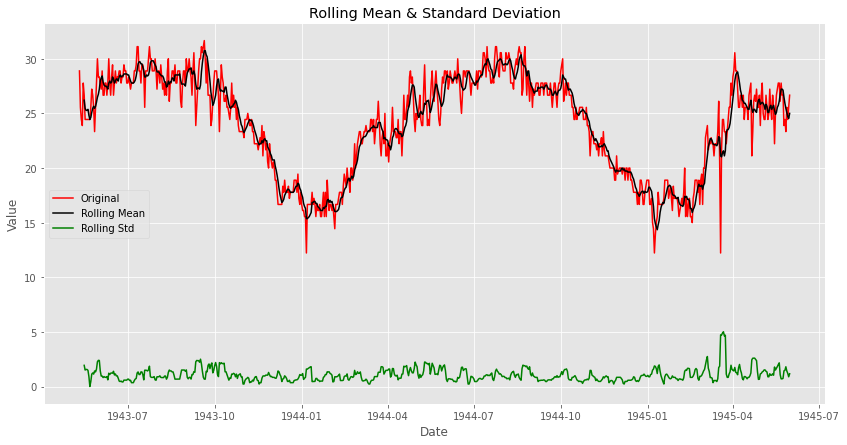

Test Statistic: -1.4095966745887747
p-value: 0.577666802852636
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Check ADFuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Check mean and standard deviation
def check_mean_std(ts):
    # Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    
    plt.figure(figsize=(14, 7))   
    plt.plot(ts, color='red', label='Original')
    plt.plot(rolmean, color='black', label='Rolling Mean')
    plt.plot(rolstd, color='green', label='Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

# Example usage
# Ensure ts is a pandas Series or DataFrame column
# Example: ts = pd.Series(your_data_here)
# Example: ts = pd.DataFrame({'MeanTemp': your_data_here})['MeanTemp']

# Check mean and std
check_mean_std(ts)

# Check stationarity with ADFuller test
check_adfuller(ts)


Make a Time Series Stationary?


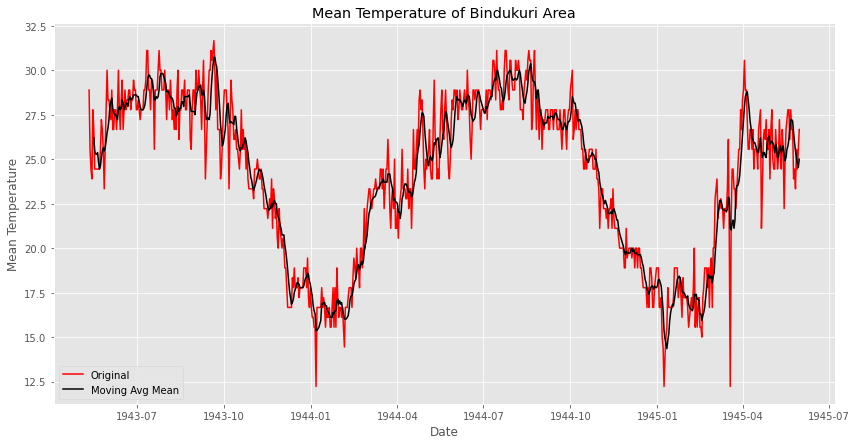

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure ts is a pandas Series with your time series data
# Example: ts = pd.Series(your_data_here)

# Moving average method
window_size = 6
moving_avg = ts.rolling(window=window_size).mean()

plt.figure(figsize=(14, 7))
plt.plot(ts, color="red", label="Original")
plt.plot(moving_avg, color='black', label="Moving Avg Mean")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()


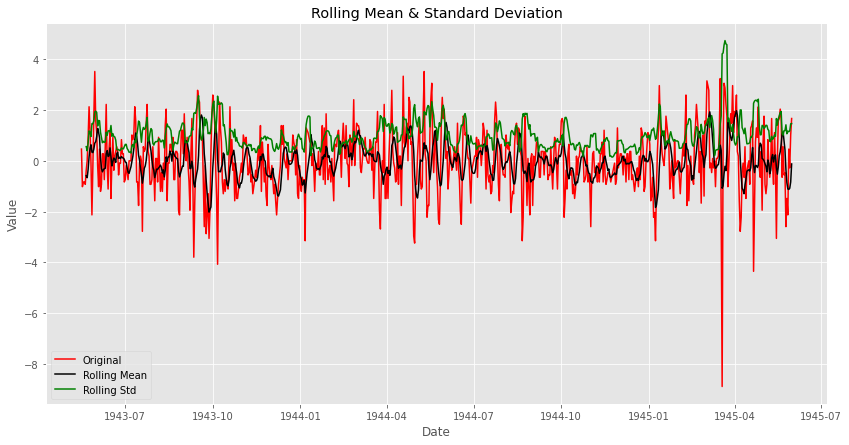

Test Statistic: -11.1385143351385
p-value: 3.150868563164087e-20
Critical Values: {'1%': -3.4392539652094154, '5%': -2.86546960465041, '10%': -2.5688625527782327}


In [40]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.MeanTemp)

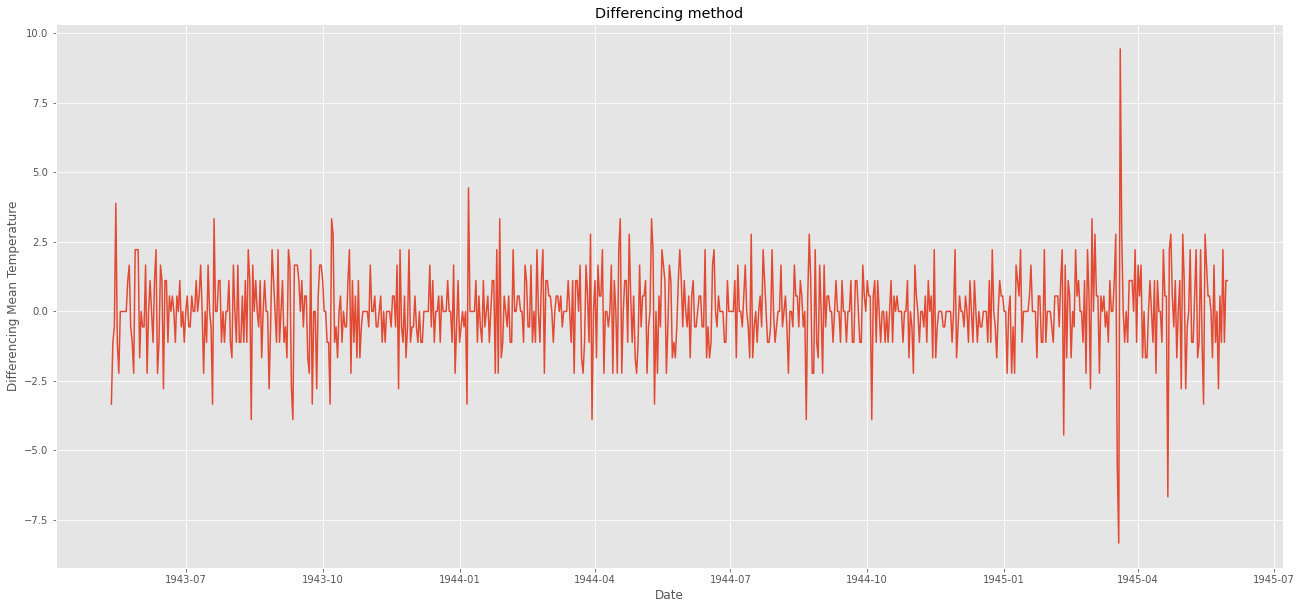

In [41]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

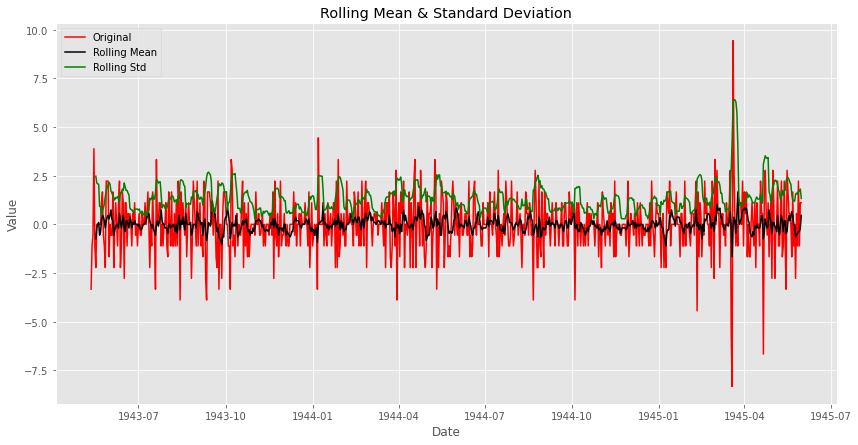

Test Statistic: -11.678955575105366
p-value: 1.760207569355997e-21
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [42]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.MeanTemp)

Forecasting a Time Series


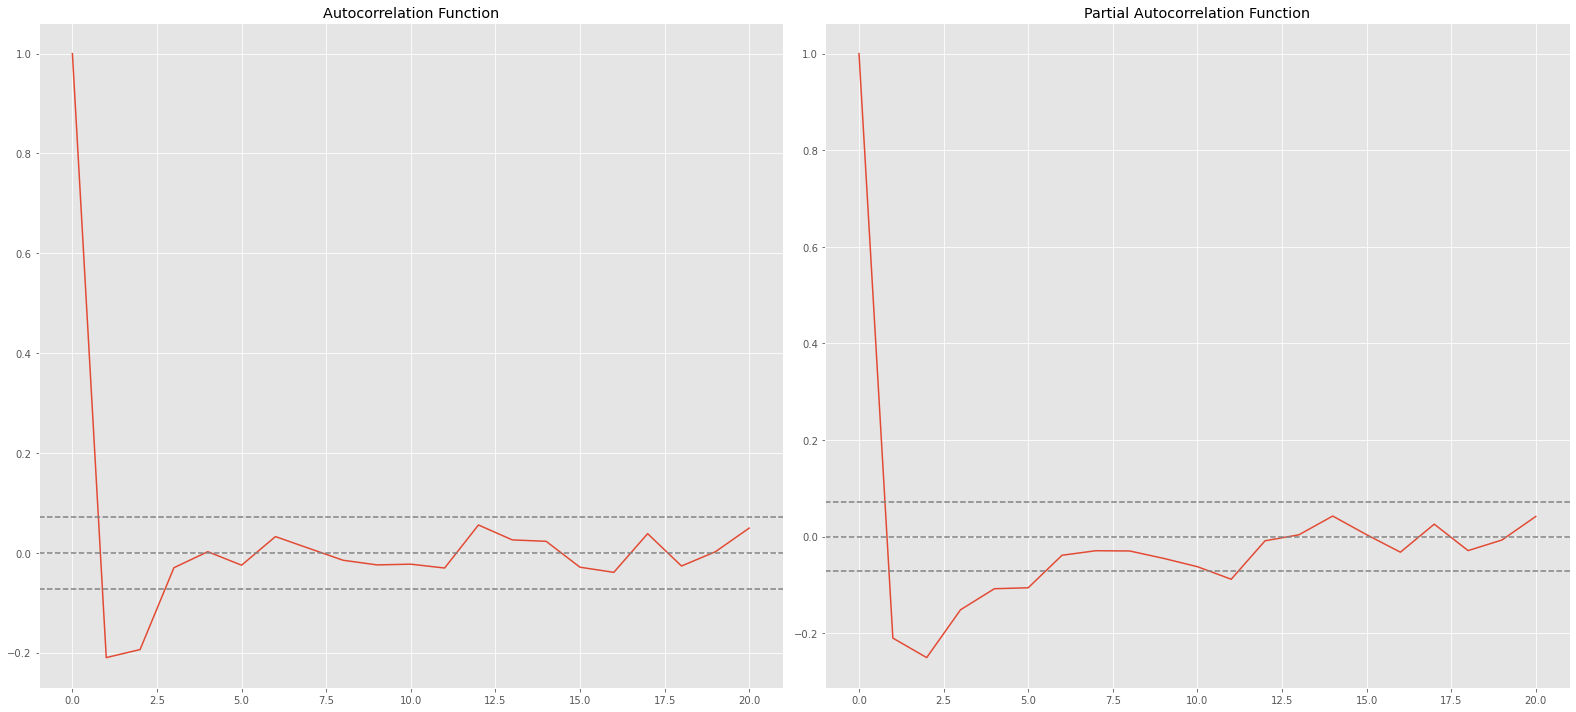

In [43]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\Users\Taner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Taner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Taner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



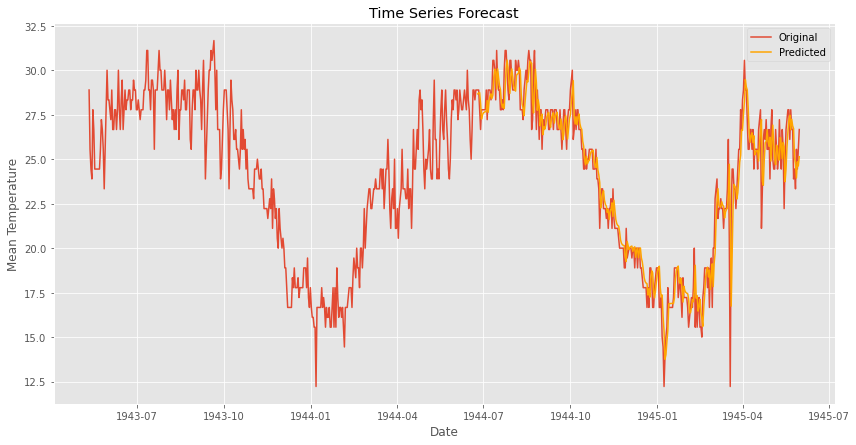

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure ts is a pandas Series with a datetime index
# Example: ts = pd.Series(your_data_here, index=pd.to_datetime(your_dates_here))

# Fit ARIMA model
model = ARIMA(ts, order=(1, 0, 1))  # (ARMA) = (1,0,1)
model_fit = model.fit()

# Define forecast period
start_index = pd.to_datetime('1944-06-25')
end_index = pd.to_datetime('1945-05-31')

# Forecast
forecast = model_fit.predict(start=start_index, end=end_index)

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(ts, label="Original")
plt.plot(forecast, label="Predicted", color='orange')
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()


c:\Users\Taner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Taner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Taner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Error (MSE): 1.8625810280597541


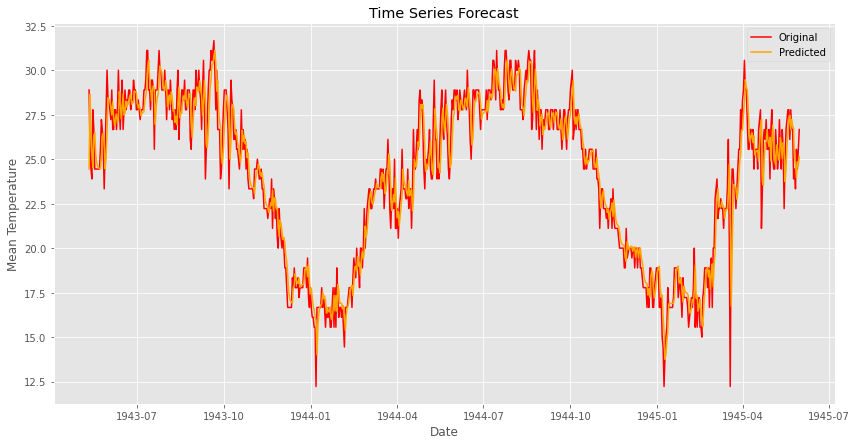

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Ensure ts is a pandas Series with a datetime index
# Example: ts = pd.Series(your_data_here, index=pd.to_datetime(your_dates_here))

# Fit ARIMA model
model2 = ARIMA(ts, order=(1, 0, 1))  # (ARMA) = (1,0,1)
model_fit2 = model2.fit()

# Forecasting
forecast2 = model_fit2.predict(start=0, end=len(ts)-1)  # Predicting over the entire range of the original series

# Calculate Mean Squared Error
error = mean_squared_error(ts, forecast2)
print("Error (MSE):", error)

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(ts, label="Original", color='red')
plt.plot(forecast2, label="Predicted", color='orange')
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig('graph2.png')
plt.show()
